In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats 
import seaborn as sns
import matplotlib.pylab as plt
#carichiamo il file
strength = pd.read_csv("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/Strength_ceramic.dat",
                       sep="\s+",skiprows=48)
strength=strength.drop([0])
strength

,Id,Lab,Num,Test,Y,X1,X2,X3,X4,Trt,Set,Llab,Rep,Bat,Sblab,Set2
1,1,1.0,1.0,1.0,608.781,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
2,2,1.0,2.0,1.0,569.670,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
3,3,1.0,3.0,1.0,689.556,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
4,4,1.0,4.0,1.0,747.541,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
5,5,1.0,5.0,1.0,618.134,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,956,8.0,26.0,4.0,698.254,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0
477,957,8.0,27.0,4.0,611.999,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,1.0,8.25,32.0
478,958,8.0,28.0,4.0,748.130,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0
479,959,8.0,29.0,4.0,530.680,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,1.0,8.25,32.0


In [4]:
df = strength.drop(columns=['Y'])

k, loc, x_0=scipy.stats.weibull_min.fit(strength.Y)

In [5]:
x_0

1.5641755978581595

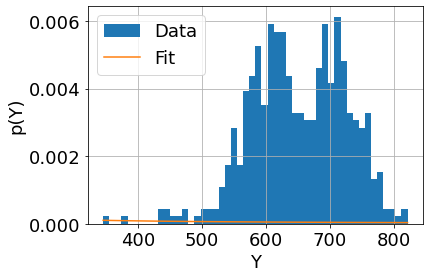

In [6]:
plt.rcParams.update({'font.size': 18})
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
strength.Y.hist(bins=50, density=True, label='Data')
# fit
W=scipy.stats.weibull_min(k,loc=0, scale=x_0) 
plt.plot(x, W.pdf(x), label="Fit")
plt.xlabel('Y')
plt.ylabel('p(Y)')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (101,) and (1,)

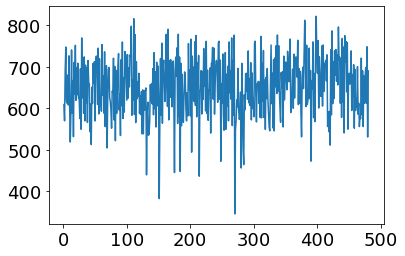

<AxesSubplot:xlabel='X1', ylabel='Y'>

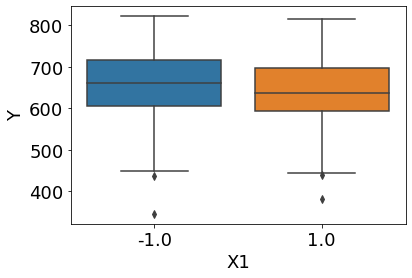

In [21]:
sns.boxplot(data=strength, x="X1", y="Y")


<AxesSubplot:xlabel='X3', ylabel='Y'>

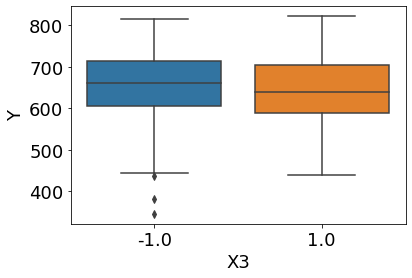

In [17]:
sns.boxplot(data=strength, x="X3", y="Y")

In [18]:
k, loc, x_0=scipy.stats.weibull_min.fit(strength.X1)
x_0

2.0480425637010686

C:\Users\Francesco\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2108: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


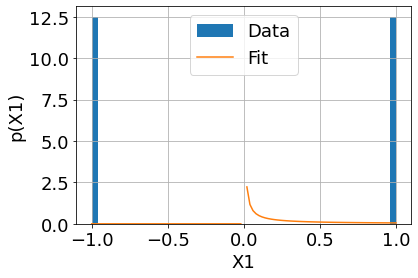

In [19]:
plt.rcParams.update({'font.size': 18})
xmin=np.min(strength.X1)
xmax=np.max(strength.X1)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
strength.X1.hist(bins=50, density=True, label='Data')
# fit
W=scipy.stats.weibull_min(k,loc=0, scale=x_0) 
plt.plot(x, W.pdf(x), label="Fit")
plt.xlabel('X1')
plt.ylabel('p(X1)')
plt.legend()

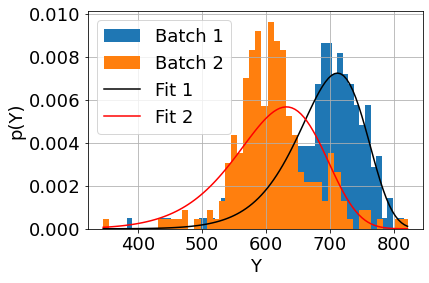

In [10]:
Bat1=strength.loc[strength.Bat==1]
Bat2=strength.loc[strength.Bat==2]


k1, loc, x_1=scipy.stats.weibull_min.fit(Bat1.Y, floc=0)
k2, loc, x_2=scipy.stats.weibull_min.fit(Bat2.Y, floc=0)


# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
Bat1.Y.hist(bins=50, density=True, label='Batch 1')
Bat2.Y.hist(bins=50, density=True, label='Batch 2')
# fit
W1=scipy.stats.weibull_min(k1,loc=0, scale=x_1) 
W2=scipy.stats.weibull_min(k2,loc=0, scale=x_2)
plt.plot(x, W1.pdf(x), label="Fit 1", color="black")
plt.plot(x, W2.pdf(x), label="Fit 2", color="red")
plt.xlabel('Y')
plt.ylabel('p(Y)')
plt.legend()